In [31]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [20]:
cd C:\Users\pierr\Documents\System_identification\

C:\Users\pierr\Documents\System_identification


- Se leen datos

In [39]:
df = pd.read_csv('data/exportedVariables.csv')
df

,time,G.y,G.u
0,0.00,0.000000,0.018661
1,0.05,0.000008,0.018661
2,0.10,0.000058,0.018661
3,0.15,0.000186,0.018661
4,0.20,0.000423,0.018661
...,...,...,...
4007,199.90,0.383075,0.382856
4008,199.95,0.383069,0.382856
4009,200.00,0.383059,0.382856
4010,200.00,0.383059,0.071482


In [40]:
df = df.rename(columns={'G.y':'y',
                        'G.u':'u'})
df

,time,y,u
0,0.00,0.000000,0.018661
1,0.05,0.000008,0.018661
2,0.10,0.000058,0.018661
3,0.15,0.000186,0.018661
4,0.20,0.000423,0.018661
...,...,...,...
4007,199.90,0.383075,0.382856
4008,199.95,0.383069,0.382856
4009,200.00,0.383059,0.382856
4010,200.00,0.383059,0.071482


- Se introducen las versiones de tiempos anteriores para la entrada y la salida

In [62]:
df['y1'] = df['y'].shift(1,fill_value=0)
df['y2'] = df['y'].shift(2,fill_value=0)
df['y3'] = df['y'].shift(3,fill_value=0)
df['u1'] = df['u'].shift(1,fill_value=0)
df['u2'] = df['u'].shift(2,fill_value=0)
df['u3'] = df['u'].shift(3,fill_value=0)
df['u_cuad'] = df['u']**2
df

,time,y,u,y1,y2,y3,u1,u2,u3,u_cuad
0,0.00,0.000000,0.018661,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000348
1,0.05,0.000008,0.018661,0.000000,0.000000,0.000000,0.018661,0.000000,0.000000,0.000348
2,0.10,0.000058,0.018661,0.000008,0.000000,0.000000,0.018661,0.018661,0.000000,0.000348
3,0.15,0.000186,0.018661,0.000058,0.000008,0.000000,0.018661,0.018661,0.018661,0.000348
4,0.20,0.000423,0.018661,0.000186,0.000058,0.000008,0.018661,0.018661,0.018661,0.000348
...,...,...,...,...,...,...,...,...,...,...
4007,199.90,0.383075,0.382856,0.383076,0.383072,0.383064,0.382856,0.382856,0.382856,0.146579
4008,199.95,0.383069,0.382856,0.383075,0.383076,0.383072,0.382856,0.382856,0.382856,0.146579
4009,200.00,0.383059,0.382856,0.383069,0.383075,0.383076,0.382856,0.382856,0.382856,0.146579
4010,200.00,0.383059,0.071482,0.383059,0.383069,0.383075,0.382856,0.382856,0.382856,0.005110


<AxesSubplot: xlabel='time', ylabel='u'>

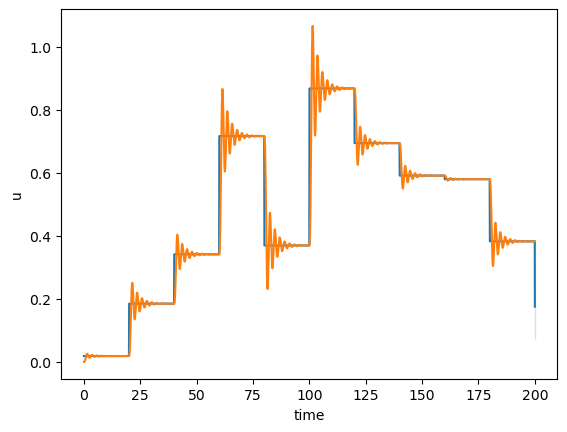

In [63]:
sns.lineplot(data = df, 
             x = 'time',
             y = 'u')
sns.lineplot(data = df, 
             x = 'time',
             y = 'y')

In [102]:
hipo1 = '''y ~ u + u1 + u2 + u3 +
                 y1 + y2 + y3'''

mod1 = smf.ols(formula = hipo1, data = df).fit()
print(mod1)

In [103]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.438e+12
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:19:32   Log-Likelihood:                 46577.
No. Observations:                4012   AIC:                        -9.314e+04
Df Residuals:                    4004   BIC:                        -9.309e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.539e-08   7.51e-08      1.271      0.204   -5.18e-08    2.43e-07
u           2.067e-05   2.56e-06      8.080      0.000    1.57e-05    2.57e-05
u1             0.0003   3.62e-06     80.154      0.000       0.000       0.000
u2             0.0017   3.75e-06    440.036      0.000       0.002       0.002
u3             0.0004   3.17e-06    112.287      0.000       0.000       0.000
y1             2.8363      0.000   2.48e+04      0.000       2.836       2.837
y2            -2.6993      0.000  -1.21e+04      0.000      -2.700      -2.699
y3             0.8607      0.000   7846.662      0.000       0.860       0.861
==============================================================================
Omnibus:                     8964.911   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        107394671.983
Skew:                          20.227   Prob(JB):                         0.00
Kurtosis:                     803.502   Cond. No.                     1.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
def modelo(u,mod1):
    u1 = u2 = u3 = 0
    y1 = y2 = y3 = 0
    y = []
    for uk in u:
        yk = (mod1.params['u']*uk +
              mod1.params['u1']*u1 +
              mod1.params['u2']*u2 +
              mod1.params['u3']*u3 +
              mod1.params['y1']*y1 +
              mod1.params['y2']*y2 +
              mod1.params['y3']*y3
             )
        y.append(yk)
        y3 = y2
        y2 = y1
        y1 = yk
        u3 = u2
        u2 = u1
        u1 = uk
    return y
        
df['y_model'] = modelo(df['u'],mod1)

<AxesSubplot: xlabel='time', ylabel='u'>

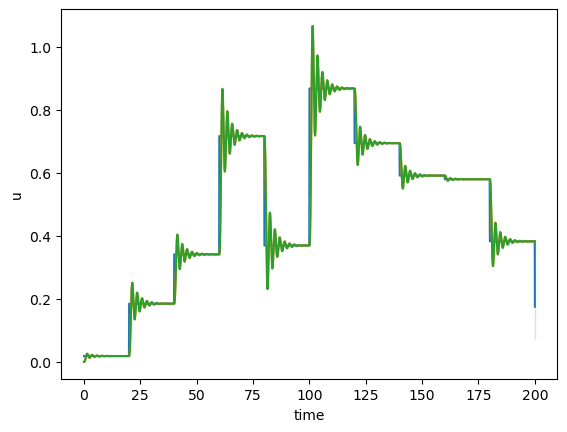

In [107]:
sns.lineplot(data = df, 
             x = 'time',
             y = 'u')
sns.lineplot(data = df, 
             x = 'time',
             y = 'y')
sns.lineplot(data = df, 
             x = 'time',
             y = 'y_model')
